In [1]:
from liquidity_code_helper import *

> This notebook contains a short presentation.  Under the hood, it uses "liquidity_code_helper.py" to house all of the code and functions.

> Information on all the functions is directly below at the end, and also on a file called "liquidity_reference_guide.ipynb" for reference.



# Estimating an Upper Bound on the Illiquidity Premium

## Monte-Carlo Simulation Using Geometric Brownian Motion and Variance Reduction Techniques


#### The motivation behind this notebook came from thinking about the following areas of study: portfolio implementation (sizing, liability analysis, cash mgmt, tracking error), illiquidity premium (risk vs edge), and building out both existing models and potentially exploring new frameworks as well. 

#### For the past year, these concepts have been something I have devoted a lot of time to try to better understand. I thought these issues would become increasingly relevant, given the prevalence over the past decade of essentially volatility suppression, low-cost passive beta vehicles, the increasing popularity of risk parity and carry strategies, combined with regulations causing a lack of willingness and ability for traditional dealers to provide liquidity.

#### I recently found a paper by Francis Longstaff (see ref. below) on how illiquidity premium can be thought of as the spread between perfect foresight and a frictionless market (liquid) versus complete lack of control caused either by highly illiquid markets and/or a formal trading restriction such as restricted stock or a lockout period before which no redemptions or transactions are allowed.

#### The paper shows that this dynamic can be thought of like the spread between a lookback option with a floating strike, the latter of which would represent the illiquid asset while the former would be like a continuously monitored lookback option in which the buyer has the right to cherry pick the most profitable point looking back in time with perfect knowledge. Since perfect foresight is an unrealistic assumption, this model can be treated as an "upper bound" on the illiquidity premium between two otherwise fungible (or highly similar) assets. I have shown this below and then expanded upon the idea using Monte Carlo simulation tools in the hopes that this might have wider and more realistic practical use.

#### This could be expanded to generate other processes (ie: SDEs / normally distributed prices, IR models, realized/implied volatility models; or derive elsewhere for use as inputs to this notebook, especially volatility).

####  I think it might also be interesting to explore some of the a) market-microstructure b) factor modeling and c) portfolio hedging, allocation, and implementation tools that I have developed over the past year. All of this could potentially be integrated into a separate program (upstream) to deeply analyze and get more realistic inputs for this notebook, such as volatility and factor loadings and also a portfolio hedge cost analysis program (downstream) to create a better picture of implementation costs, execution/impact cost vs adverse selection risk tradeoff, and where opportunities might lie either across different markets or within the curve and micro vs macro time considerations.  Once armed with a better understanding of liquidity risk (or opportunities), which I suspect might often get overlooked, then the goal here is to look for ways to expand upon this analysis in other areas.


<br>
<br>


### Chart 1: Illustration of convergence for the fixed strike case shown below for reference

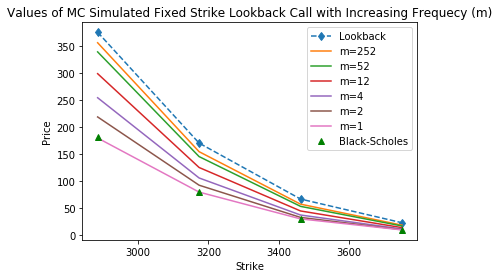

In [2]:
generateMC_BS_chart()

In [3]:
n100k, n1mm = runLiquidity_MC()


BS Value for Vanilla Euro Call: 181.25

Closed-Form Value for Fixed Strike Lookback Call: 375.97

Implied Upper Bound Illiquidity Premium (Percentage Points) and Standard Errors Using Variance Reduction Techniques:



### Table1: Shows how the upper bound for the illiquitidy premium (higher numbers = wider liquidity gap) and estimation errors are distributed across different time windows.

#### (eg: Weekly <=> not being able to exit a risky position for 5 trading days vs immediate/continuous execution ability).

In [4]:
n100k

,MC Price (n=100k):,Illiquidity Premium,Standard Error,Std Error (Antithetic),Std Error (Euro CV),Std Error (Brownian Bridge)
Sampling Freq,,,,,,
Daily,356.22,0.06,0.97,0.42,0.47,0.03
Weekly,339.39,0.11,0.97,0.42,0.47,0.07
Monthly,299.07,0.26,0.95,0.42,0.44,0.15
Quarterly,254.94,0.47,0.94,0.44,0.38,0.25
Semi-Annual,219.39,0.71,0.92,0.46,0.30,0.37
Maturity,180.37,1.08,0.91,0.50,0.07,0.42


### Table2: Increasing the sample size and the impact of variance reduction techniques

In [5]:
n1mm

,MC Price (n=1mm):,Illiquidity Premium,Standard Error,Std Error (Antithetic),Std Error (Euro CV),Std Error (Brownian Bridge)
Sampling Freq,,,,,,
Daily,356.74,0.05,0.31,0.13,0.15,0.01
Weekly,339.82,0.11,0.31,0.13,0.15,0.02
Monthly,299.65,0.25,0.30,0.13,0.14,0.05
Quarterly,255.47,0.47,0.30,0.14,0.12,0.08
Semi-Annual,219.94,0.71,0.29,0.15,0.10,0.12
Maturity,180.54,1.08,0.29,0.16,0.02,0.13


>  We can see the variance is reduced most significantly using both methods of control variates (Euro and Brownian Bridge). And antithetic variates alone cut the error in half.

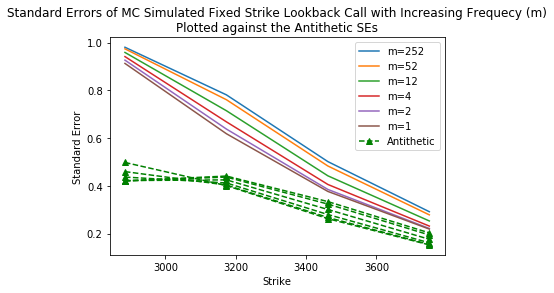

In [6]:
# Plot of impact of antithetic variate on standard errors of the price estimates from MC sim
generateVarChart()

# Closed-Form Analytic Solution (Uses Longstaff Model*)




##### *Paper: How Much Can Marketability Affect Security Values?, Francis A. Longstaff, Journal of Finance, Dec. 1995

In [7]:
# lists for volatility and time windows to be used as inputs for getLiquidity and plotLiquidity
sigList = [0.01,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50]

# intraday
Tintra = [1/(24*60), 1/24, 1/12, 1/8, 1/4,1/3,1/2]
TintraNames = ['1 Minute', '1 Hour', '2 Hours', '3 Hours', '6 Hours', '8 Hours', '12 Hours']

# +1 day
TList = [1,2,5,10,20,30,60,90]
TNames = ['1 Day', '2 Days', '5 Days', '10 Days', '20 Days', '30 Days', '60 Days', '90 Days']

### Tables 3/4: Shows how the upper bound for the illiquitidy premium is distributed across different time windows and volatilities

In [8]:
df = getLiquidity(sigList, Tintra, TintraNames, type='Intraday')
df

Maximum Estimated Intraday Illiquidity Premium (Basis Points)


$$\sigma =$$,0.01,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50
Execution Time,,,,,,,,,,,
1 Minute,0.13,0.66,1.32,1.99,2.65,3.31,3.97,4.64,5.30,5.96,6.62
1 Hour,1.03,5.13,10.26,15.40,20.54,25.68,30.82,35.96,41.10,46.25,51.40
2 Hours,1.45,7.26,14.52,21.78,29.05,36.33,43.60,50.88,58.17,65.46,72.75
3 Hours,1.78,8.89,17.78,26.68,35.59,44.50,53.42,62.35,71.28,80.22,89.16
6 Hours,2.51,12.57,25.16,37.75,50.36,62.98,75.62,88.26,100.92,113.59,126.28
8 Hours,2.90,14.52,29.05,43.60,58.17,72.75,87.35,101.97,116.61,131.26,145.92
12 Hours,3.55,17.78,35.59,53.42,71.28,89.16,107.07,125.00,142.96,160.94,178.95


In [9]:
df2 = getLiquidity(sigList, TList, TNames)
df2

Maximum Estimated Long-Term Illiquidity Premium (Percentage)


$$\sigma =$$,0.01,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50
Lockout Period,,,,,,,,,,,
1 Day,0.05,0.25,0.50,0.76,1.01,1.26,1.52,1.77,2.03,2.28,2.54
2 Days,0.07,0.36,0.71,1.07,1.43,1.79,2.15,2.51,2.88,3.24,3.60
5 Days,0.11,0.56,1.13,1.70,2.27,2.84,3.42,3.99,4.58,5.16,5.74
10 Days,0.16,0.80,1.60,2.41,3.22,4.04,4.86,5.69,6.52,7.36,8.20
20 Days,0.22,1.13,2.27,3.42,4.58,5.74,6.92,8.11,9.31,10.52,11.74
30 Days,0.28,1.38,2.78,4.20,5.63,7.07,8.53,10.01,11.50,13.00,14.53
60 Days,0.39,1.96,3.95,5.98,8.03,10.11,12.23,14.37,16.55,18.76,21.00
90 Days,0.48,2.41,4.86,7.36,9.90,12.49,15.13,17.81,20.55,23.33,26.16


In [10]:
# time series for charting
series1= list(np.linspace(0,24,24))
series2 = list(np.linspace(0,90,90))

> The illiquidity premium is dramatically more sensitive to changes in implied volatility for relatively shorter time windows. 



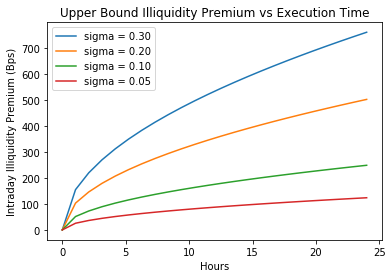

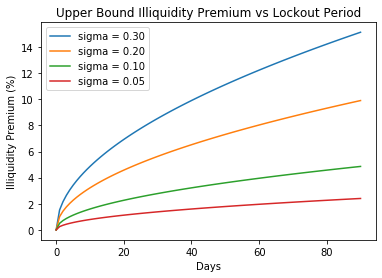

In [11]:
xx, yy = getCharts(sigList,series1, TintraNames, series2, TNames, type1='Intraday', type2=None)

In [12]:
# generated chart raw data for intraday time series
xx

$$\sigma =$$,0.01,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5.135338,25.697406,51.446638,77.247763,103.100847,129.005957,154.963158,180.972519,207.034104,233.147980,259.314214
2,7.263072,36.356796,72.817299,109.381698,146.050180,182.822934,219.700146,256.682006,293.768701,330.960419,368.257348
3,8.895980,44.542065,89.239756,134.093416,179.103391,224.270027,269.593668,315.074660,360.713348,406.510077,452.465192
4,10.272747,51.446638,103.100847,154.963158,207.034104,259.314214,311.804021,364.504056,417.414851,470.536937,523.870845
5,11.485827,57.532776,115.325094,173.377696,231.691326,290.266727,349.104640,408.205809,467.570976,527.200884,587.096275
6,12.582635,63.037555,126.386645,190.048247,254.023337,318.312892,382.917888,447.839301,513.078106,578.635281,644.511801
7,13.591337,68.101809,136.567167,205.397305,274.593453,344.156841,414.088700,484.390259,555.062749,626.107400,697.525440
8,14.530285,72.817299,146.050180,219.700146,293.768701,368.257348,443.167589,518.500927,594.258865,670.442906,747.054552
9,15.412228,77.247763,154.963158,233.147980,311.804021,390.933076,470.536937,550.617398,631.176252,712.215291,793.736308


In [13]:
# generated chart raw data for daily time series
yy

$$\sigma =$$,0.01,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.050554,0.252969,0.506440,0.760414,1.014891,1.269873,1.525359,1.781351,2.037849,2.294853,2.552365
2,0.071499,0.357899,0.716803,1.076714,1.437633,1.799563,2.162505,2.526461,2.891433,3.257422,3.624430
3,0.087574,0.438473,0.878455,1.319947,1.762955,2.207480,2.653527,3.101098,3.550197,4.000828,4.452993
4,0.101127,0.506440,1.014891,1.525359,2.037849,2.552365,3.068913,3.587498,4.108125,4.630799,5.155525
...,...,...,...,...,...,...,...,...,...,...,...
85,0.466842,2.351345,4.745823,7.183931,9.666165,12.193021,14.764995,17.382582,20.046276,22.756570,25.513959
86,0.469585,2.365263,4.774169,7.227225,9.724934,12.267802,14.856333,17.491032,20.172400,22.900941,25.677157
87,0.472313,2.379101,4.802357,7.270280,9.783386,12.342187,14.947198,17.598930,20.297895,23.044605,25.839570
88,0.475024,2.392862,4.830389,7.313103,9.841527,12.416185,15.037597,17.706286,20.422772,23.187575,26.001214


# Code and Function Documentation Below

In [15]:
help(BS)

Help on function BS in module liquidity_code_helper:

BS(S, K, r, q, sigma, T, flavor='c', style='euro', display='no', t=0)
    This function takes input parameters for vanilla european options.
    Flavor for p/c, style, display. Returns closed-form price and greeks.



In [16]:
help(generateMC_BS_chart)

Help on function generateMC_BS_chart in module liquidity_code_helper:

generateMC_BS_chart()
    This program is predefined to run a MC sim for a lookback option,
    calulates the closed-form analytic solution for the same option,
    prices a vanilla european call with the same parameters using 
    Black-Sholes.  Generates a chart showing how increasing the
    sampling frequency of the discretely sampled lookback MC sim causes
    the values to shift from the Black-Scholes value (for m=1) towards 
    the value of the continuous lookback (as m grows large).



In [17]:
help(generateVarChart)

Help on function generateVarChart in module liquidity_code_helper:

generateVarChart()
    Variance reduction using antithetic variates.  This program is 
    predefined to run a MC sim for a lookback option, and generates a 
    chart which shows the effects of using antithetic variates 
    with various sampling frequencies.



In [18]:
help(getCharts)

Help on function getCharts in module liquidity_code_helper:

getCharts(sigList, TList1, TNames1, TList2, TNames2, type1=None, type2=None)
    This is a program that executes plotLiquidity() function specifically
    desined for a time series on the x-axis.



In [19]:
help(getLiquidity)

Help on function getLiquidity in module liquidity_code_helper:

getLiquidity(sigList, TList, TNames, type=None)
    This program takes a list of volatilities and time horizons as inputs.
    Outputs dataframe summary of illiquidity premium sorted by time horizon (columns)
    and volatility (rows). 
    
    Set type to intraday (bps) or None (%)



In [20]:
help(lookback_Analytic)

Help on function lookback_Analytic in module liquidity_code_helper:

lookback_Analytic(S, K, r, q, sigma, T, flavor='fixed strike call', t=0)
    This function computes the continuous time analytical price for lookback 
    options.
    
    Input to select parameters, flavor = fixed/float and put/call.
    Outputs final price.



In [21]:
help(lookback_MC)

Help on function lookback_MC in module liquidity_code_helper:

lookback_MC(batches, freqs, S, K, r, q, sigma, T, antithetic='no', flavor='c', style='float', display='no', t=0)
    Bare-bones Monte Carlo sim for a fixed strike lookback option.
    
    This function generate batches (a list) of n normally distributed 
    random variables, which are used to generate a geometric brownian motion 
    along n sample paths.
    
    Alternatively, you can run a list of frequencies for a given batch size.
    
    Then we calculate the maximum values, for each batch, along
    each n paths, for the specified frequency and number of steps.  
    
    We end up with a row vector of n maximums, 
    which are then used to calculate the discounted payoff, then we take the 
    mean of each of these.
    
    Ouputs price and standard error.



In [22]:
help(lookback_MC_CV_bridge)

Help on function lookback_MC_CV_bridge in module liquidity_code_helper:

lookback_MC_CV_bridge(batches, freqs, S, K, r, q, sigma, T, CV_val, flavor='c', style='float', display='no', t=0)
    Monte Carlo sim for a fixed-strike lookback option using a 
    Brownian Bridge technique as a control variate for variance reduction.
    
    This function generates batches of n normally distributed random variables, 
    which are used to generate a geometric brownian motion along n sample paths.  
    Then we calculate the maximum values, for each batch, along
    each n paths, for the specified frequency and number of steps.  
    
    Alternatively it can run the frequencies in batches for a specified batch size.  
    
    We end up with a row vector of n maximums, which are then used to calculate 
    each discounted payoff.  
    
    We use the Box-Muller method to generate normal distributions drawn from a 
    uniform[0,1] to fill in the gaps between sampling periods for variance reduc

In [23]:
help(lookback_MC_CV_european)

Help on function lookback_MC_CV_european in module liquidity_code_helper:

lookback_MC_CV_european(batches, freqs, S, K, r, q, sigma, T, CV_val, flavor='c', style='float', display='no', t=0)
    Monte Carlo sim for a fixed strike lookback option using a european 
    call as a control variate for variance reduction.
    
    This function generates batches of n normally distributed random variables, 
    which are used to generate a geometric brownian motion along n sample paths.  
    
    Then we calculate the maximum values, for each batch, alongeach n paths, 
    using the specified sampling frequency and number of steps.  
    
    Alternatively it can run the frequencies in batches for a specified batch size. 
    
    We end up with a row vector of n maximums, which are then used to calculate 
    the discounted payoffs.  
    
    Here we are also doing the same process as above for the simulated vanilla 
    european option.
    
    We take the mean of the diiference of these

In [24]:
help(MC)

Help on function MC in module liquidity_code_helper:

MC(batches, St, K, r, q, sigma, T, flavor='Call', alpha=0, style='euro', seed=2, t=0)
    This function is a bare bones Monte Carlo simulator.  It will generate a 
    Geometric Brownian Motion using inputs for parameters, style, seed.  
    
    Alpha is used for power and root payout structures.



In [25]:
help(plotLiquidity)

Help on function plotLiquidity in module liquidity_code_helper:

plotLiquidity(sigList, TList, TNames, type=None)
    This program takes a list of volatilities and time horizons as inputs.
    Outputs plots of illiquidity premium (y-axis) vs time horizon (x-axis).
    
    Use with getCharts() function. 
    
    Set type to intraday (bps) or None (%)



In [26]:
help(runLiquidity_MC)

Help on function runLiquidity_MC in module liquidity_code_helper:

runLiquidity_MC()
    This program is predefined to set up the necessary control variates,
    run a MC sim for a fixed strike lookback option and compute the
    BS price, continuous lookback price, and discretely sampled sim
    prices.  The goal is to compute an upper bound for the expected
    illiquidity premium (in percentage terms for various windows of time*)
    by comparing the simulated discretely sampled lookback prices 
    to those of the continuous analytical price.
    
    Generates a table with summary statistics.
    
    *For intraday windows: this can be viewed as the max premium to pay
    to compensate for the time lag it would take to execute an illiquid position.
    
    *For +1 day time horizon: this can be viewed as a restricted stock or
    investment with a lockout period.
    
    As sampling freq (m) approaches zero: the sim price moves closer to the BS
    value (illiquid) and further fr